## Midterm 1

### Problem 1

In [105]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from nptyping import Float, NDArray, Shape
from typing import Any, Optional, Tuple

# Create a default RNG numpy generator
rng = default_rng()

# Declare the linear perceptron algorithm
def linearPerceptron(
    x : NDArray[Shape["*, 2"], Any], 
    y : NDArray[Shape["*, 1"], Any], 
    epochs : int = 100, 
    learning_rate : float = 0.1, regularization : float = 0,
    mode : str = "original",
    shuffle : bool = True,
    roll : Optional[int] = None
    
) -> Tuple[NDArray[Shape["3"], Float], np.ndarray]:

    # Parameters
    # (Parameters + bias)
    theta : np.ndarray = np.array([[0, 0, 0]])
    theta_prev = theta.copy()

    # Cumulative mistakes for each point in "x"
    mistakes : np.ndarray = np.zeros_like(y)

    # Generate an array of indices that go from 0 to the number
    # of data points. 
    indices : np.ndarray = np.arange(len(x))

    # Shift the order of the array by a certain number of positions to the right
    # Roll = -1: [0, 1, 2] -> [2, 0, 1]
    if roll:
        indices = np.roll(indices, -roll)

    # Go through each epoch
    for t in range(epochs):

        # The previous indices are shuffled in the case that the associated option is enabled
        if shuffle:
            rng.shuffle(indices)

        # Go through each data point
        for i in indices:

            x_i = x[i, :]
            y_i = y[i]


            # Append a 1 at the end of Xi to make the bias operation be
            # already included in the dot product
            x_i = np.append(x_i, 1)

            # Get the prediction for the "ith" datapoint
            y_pred = np.dot(theta, x_i)

            # Estimate the labels for all points using the new theta
            y_hat = np.sign(np.dot(theta[0, 0:2], x.T) + theta[0, 2])

            # print("DATA POINT:", x_i, "/ TRUE LABEL:", y_i, "/ PREDICTED:", y_pred)
            
            # A prediction mistakes vector is calculated (y_mistakes)
            # - Apply a sign function to set it to -1 or 1.
            # - Values equal to 0 are set to -1 as well
            # - All +1 values are set to 0, cause they are not mistakes
            # - All -1 values are set to 1, cause they ARE mistakes
            # - The prediction is reshaped into a (10,1) array
            # - The resulting y_mistakes version is added to the mistakes vector
            y_mistakes = y_hat.copy()
            y_mistakes[y_hat == 0] = -1
            y_mistakes[y_mistakes == 1] = 0
            y_mistakes[y_mistakes == -1] = 1
            y_mistakes = np.reshape(y_mistakes, (-1, 1))
            # mistakes = mistakes + y_mistakes

            # If the real Y and predicted Y are different (Their product is negative)
            # y = -1 | pred = -1 | out = 1
            # y = -1 | pred = +1 | out = -1
            # y = +1 | pred = -1 | out = -1
            # y = +1 | pred = +1 | out = 1 
            if mode == "original":
                if y_i * y_pred <= 0:
                    # print("OPERATION:", x_i, theta, "=", y_pred)
                    theta = theta + y_i * x_i
                    # print(theta)
                    mistakes[i] += 1


            # Update: Stochastic Gradient Descent
            elif mode == "sgd":

                loss = np.mean(np.maximum(0, 1 - y_i * y_pred))

                # dLoss_dTheta = Gradient of the hinge loss
                dLoss_dTheta = - (y_i * x_i) + (regularization * theta)
                theta = theta - learning_rate * dLoss_dTheta

            # Take note of the previous value for the estimation for next iteration
            theta_prev = theta.copy()
                
    # Return the parameters
    return theta, mistakes

#### 1. (1) / 1. (2)

Get the parameters for the final perceptron, when we initialize the parameters to all zero values and run the linear perceptron algorithm through these points in a particular order until convergence.

Parameters: [[ 2  2 -9]]
Mistakes:  [[1 7 4 2 2 6 0 1 0 0]]


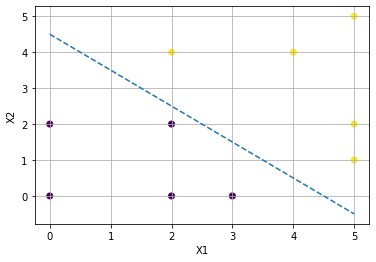

In [181]:
# ===============
# DATA AND PARAMETERS
# ===============

# Epochs
epochs : int = 100

# Data points / Coordinates
x : np.ndarray = np.array([
    [0, 0],
    [2, 0],
    [3, 0],
    [0, 2],
    [2, 2],
    [5, 1],
    [5, 2],
    [2, 4],
    [4, 4],
    [5, 5]
])

# Data labels
y : np.ndarray = np.array([[-1, -1, -1, -1, -1, 1, 1, 1, 1, 1]]).T

# ===============
# ALGORITHM
# ===============

# Roll (Shuffle = False):
# 0 = Nope (Epochs 15) = [[ 2 12 12  2  3 14  0  0  0  0]]
# 1 = Okay (Epochs 15) = [[ 1  4  2  1  0  3  0  0  0  0]]
# 2 = Nope (Epochs 15) = [[ 1 13 12  2  3 15  0  0  0  0]]
# 3 = Nope (Epochs 15) = [[ 1 13 13  2  3 15  0  0  0  0]]
# 4 = Nope (Epochs 15) = [[ 1 14 11  0  5 15  0  0  0  0]]
# 5 = Nope (Epochs 15) = [[ 1 13 13  2  4 15  0  0  0  0]]
# 6 = Nope (Epochs 15) = [[ 1 12 12  3  3 13  1  0  0  0]]
# 7 = Okay (Epochs 15) = [[ 1  7  4  2  2  6  0  1  0  0]]
# 8 = Nope (Epochs 15) = [[ 1 12 11  3  4 13  0  0  1  0]]
# 9 = Okay (Epochs 15) = [[ 1  6  4  2  2  5  0  0  0  1]]
theta, mistakes = linearPerceptron(x, y, shuffle=False, epochs = 20, roll=7)

print("Parameters:", theta)
print("Mistakes: ", mistakes.T)

# ===============
# PLOT
# ===============

# Boundary
x_line = np.linspace(0, 5, 30)
y_line = (theta[0, 0] * x_line + theta[0, 2]) / -theta[0, 1]
plt.plot(x_line, y_line, '--', label='Classifier')

# Plot the points to classify
plt.scatter(x[:, 0], x[:, 1], c = y[:,0])

# Plot settings
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()

#### 1. (3)

Get the perceptron parameters but now maximizing for the margin separator

Parameters: [[0.99995702 0.99994533]] [-4.99973041]


c:\Users\eddysanoli\.virtualenvs\Machine_Learning_with_Python-7V858pgh\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


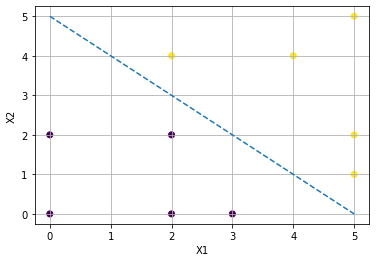

In [180]:
from sklearn.svm import LinearSVC

# ===============
# ALGORITHM
# ===============

# Train the linear classifier
clf = LinearSVC(C = 60, loss="hinge", random_state=100)
clf.fit(x, np.reshape(y, (-1,)) )

# Print the trained parameters
print("Parameters:", clf.coef_, clf.intercept_)

# ===============
# PLOT
# ===============

# Boundary
x_line = np.linspace(0, 5, 30)
y_line = (clf.coef_[0,0] * x_line + clf.intercept_) / -clf.coef_[0,1]
plt.plot(x_line, y_line, '--', label='Classifier')

# Plot the points to classify
plt.scatter(x[:, 0], x[:, 1], c = y[:,0])

# Plot settings
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()

#### 1. (5)

Using the parameters $\theta$ and $\theta_0$ corresponding to the maximum margin separator, what is the sum of Hinge losses evaluated on each example?

In [192]:
# Define the hinge loss function
def hinge_loss(z):
    return np.maximum(0,1-z)

# Get the parameters from the previous training
theta = clf.coef_.copy()
theta0 = clf.intercept_.copy()

# Get the hinge loss for all samples
all_losses = hinge_loss(y * (theta @ x.T + theta0).T)

# Print the sum of all losses
print("Sum of Losses:", np.sum(all_losses))

Sum of Losses: 0.00010934267409989928


#### 1. (6)

Suppose we modify the maximum margin solution a bit and divide both $\theta$ and $\theta_0$ by 2. What is the sum of hinge losses evaluated on each example for this new separator?

In [193]:
# Divide the parameters by 2
theta = theta / 2
theta0 = theta0 / 2

# Get the hinge loss for all samples
all_losses = hinge_loss(y * (theta @ x.T + theta0).T)

# Print the sum of all losses
print("Sum of Losses:", np.sum(all_losses))

Sum of Losses: 1.5001523268347774


-----------

### Problem 2

#### 2. (3)

In [194]:
# perceptron learning algorithm
# let w be the weight vector
# w=[theta0,theta1,theta2,theta3]
# theta=[theta1,theta2,theta3]
# thet0 is the bias bias term

# perceptron learning algorithm:
# for each example x
# update w if y_pred=sign(wTx)!=y where y is the true label for x
# then w<-w+y*x update w

# Define the dataset
dataset = np.array([
    [0, 0],
    [2, 0],
    [1, 1],
    [0, 2],
    [3, 3],
    [4, 1],
    [5, 2],
    [1, 4],
    [4, 4],
    [5, 5]
])
print("The dataset:\n",dataset)
print(" ")

# Define the kernel using lambda function
k = lambda x: np.array([
    x[0]**2,
    np.sqrt(2)*x[0]*x[1],
    x[1]**2
])

# Transform the dataset using quadratic kernel
data_trans=[]
for x in map(k, dataset):
    data_trans.append(x)

# Convert the transformed data into a numpy array
data_trans = np.array(data_trans)

# Combined ones and data_trans to get the new data
# ones vector got placed as the first column in the transformed dataset
data_trans=np.hstack([np.ones(dataset.shape[0]).reshape(dataset.shape[0],1),data_trans]) # this is done for to calculate the bias term
print("Transformed dataset:\n",data_trans)

# Intialize the parameter vector with zeros
w = np.zeros(4) 

# store the mistakes in a list
mistakes=[1,65,11,31,72,30,0,21,4,15]

label=[-1,-1,-1,-1,-1,1,1,1,1,1]

for i in range(dataset.shape[0]):
    
    # mistakes got multiplied as according to the perceptron algorithm
    # the weight vector gets updated only if for each example the algorithm makes
    # mistake
    w = w + mistakes[i] * label[i] * data_trans[i] 


print(" ")
theta0=w[0]
print("Theta0 is given by ",theta0)
print(" ")
theta=w[1:]
print("Theta vector is given by :\n",theta)

The dataset:
 [[0 0]
 [2 0]
 [1 1]
 [0 2]
 [3 3]
 [4 1]
 [5 2]
 [1 4]
 [4 4]
 [5 5]]
 
Transformed dataset:
 [[ 1.          0.          0.          0.        ]
 [ 1.          4.          0.          0.        ]
 [ 1.          1.          1.41421356  1.        ]
 [ 1.          0.          0.          4.        ]
 [ 1.          9.         12.72792206  9.        ]
 [ 1.         16.          5.65685425  1.        ]
 [ 1.         25.         14.14213562  4.        ]
 [ 1.          1.          5.65685425 16.        ]
 [ 1.         16.         22.627417   16.        ]
 [ 1.         25.         35.35533906 25.        ]]
 
Theta0 is given by  -110.0
 
Theta vector is given by :
 [ 21.       -22.627417  22.      ]


-------

### Problem 4

#### 4. (4)

In [152]:
# Y1 = [
#   [ 1 -1]
#   [-1  1]
# ]

u : np.ndarray = np.array([[1,-1]]).T
v : np.ndarray = np.array([[1, -1]]).T

# POSSIBLE
print(u @ v.T)

[[ 1 -1]
 [-1  1]]


In [156]:
# Y2 = [
#   [ 1  0]
#   [ 0  1]
# ]

u : np.ndarray = np.array([[1, 1]]).T
v : np.ndarray = np.array([[0, 1]]).T

# NOT POSSIBLE
print(u @ v.T)

[[0 1]
 [0 1]]


In [157]:
# Y3 = [
#   [ 1  1]
#   [-1 -1]
# ]

u : np.ndarray = np.array([[1, -1]]).T
v : np.ndarray = np.array([[1, 1]]).T

# NOT POSSIBLE
print(u @ v.T)

[[ 1  1]
 [-1 -1]]


----------------

### Problem 5

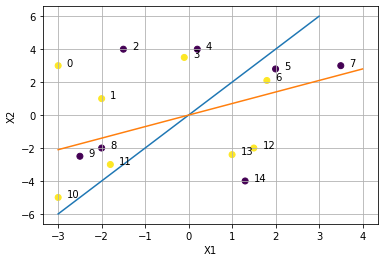

In [33]:
x : np.ndarray = np.array([
    [-3, 3],
    [-2, 1],
    [-1.5, 4],
    [-0.1, 3.5],
    [0.2, 4],
    [2, 2.8],
    [1.8, 2.1],
    [3.5, 3],
    [-2, -2],
    [-2.5, -2.5],
    [-3, -5],
    [-1.8, -3],
    [1.5, -2],
    [1, -2.4], 
    [1.3, -4]
])

y : np.ndarray = np.array([[1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1]]).T

# ===============
# PLOT
# ===============

# Boundary Z1
z1_x = np.linspace(-3, 3, 30)
z1_y = 2 * z1_x 
plt.plot(z1_x, z1_y, '-', label='z1')

# Boundary Z2
z2_x = np.linspace(-3, 4, 30)
z2_y = 0.7 * z2_x 
plt.plot(z2_x, z2_y, '-', label='z2')

# Plot the points to classify
plt.scatter(x[:, 0], x[:, 1], c = y[:,0])

# Name each dot in the plot
for i, txt in enumerate(np.arange(len(x))):
    plt.annotate(txt, (x[i,0] + 0.2, x[i,1]))

# Plot settings
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()




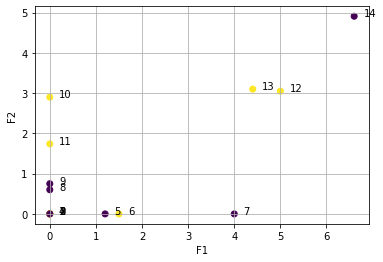

In [36]:
# ===============
# MAP TO F1/F2 SPACE
# ===============

z1 = 2*x[:,0] - x[:,1]
z2 = 0.7*x[:,0] - x[:,1]

f1 = np.maximum(0, z1)
f2 = np.maximum(0, z2)

# ===============
# NEW PLOT
# ===============

pts = 15
plt.scatter(f1[0:pts], f2[0:pts], c = y[0:pts,0])

# Name each dot in the plot
for i, txt in enumerate(np.arange(len(x))):
    plt.annotate(txt, (f1[i] + 0.2, f2[i]))

plt.xlabel("F1")
plt.ylabel("F2")
plt.grid()
plt.show()
